#  Principal Component Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

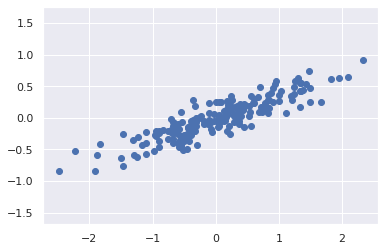

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
X

array([[-6.25301618e-01,             nan],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [ ]:
SampleX=[[-6.25301618e-01],
       [ 9.60695033e-01,  5.90900597e-01, -1.70063657e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01]]
def asarray(a, dtype=None, order=None):
    return np.array(a, dtype, copy=False, order=order)       
SampleX=asarray(SampleX)
type(SampleX)
#setting an array element with a sequence.
#Seems like we could not have 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


numpy.ndarray

In [ ]:
Xdf=pd.DataFrame(X)

In [ ]:
Xdf.iloc[0,1]=None
Xdf
#Input contains NaN, infinity or a value too large for dtype('float64').

,0,1
0,-0.625302,NaN
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867
...,...,...
195,0.838409,0.278380
196,0.312708,-0.010600
197,1.955876,0.638224
198,-1.108304,-0.395054


### Transform data into single dimension-Leave one measurement for each indicator

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The fit learns the "components" (i.e.-the loadings) and "explained variance":

In [ ]:
print(pca.components_) 

[[-0.94446029 -0.32862557]]


In [ ]:
print(pca.explained_variance_) # explained variance for for each principal component vector

[0.7625315]


In [ ]:
#print(Xdf) #original data
#print(X_pca[0:5,:]) #data transformed to a single pca vector
#X_pca_df=pd.DataFrame(X_pca)
#print(X_pca_df)

To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

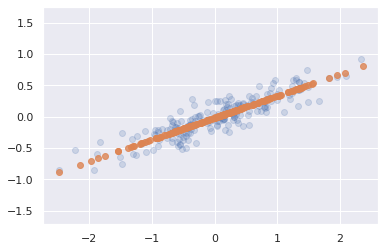

In [ ]:
X_new = pca.inverse_transform(X_pca) # inverse_transform returns pc vector to original matrix
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.

This means that the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.

The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data, the overall relationship between the data points are mostly preserved.